# Q1)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def select_frame_and_crop(video_path='output.mp4'):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_idx = np.random.randint(0, frame_count)

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if not ret:
        cap.release()
        raise ValueError("Couldn't read the frame")

    # Display the frame and let the user select ROI. Press ENTER or SPACE after selection.
    roi = cv2.selectROI("Select ROI", frame, False, False)
    cropped = frame[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]

    cap.release()
    cv2.destroyAllWindows()
    return cropped


In [3]:
def extract_random_frames(video_path='output.mp4', num_frames=10):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    selected_frames = np.random.choice(range(total_frames), num_frames, replace=False)

    saved_frame_paths = []
    for frame_idx in selected_frames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            continue
        frame_path = f'frame_{frame_idx}.png'
        cv2.imwrite(frame_path, frame)
        saved_frame_paths.append(frame_path)

    cap.release()
    return saved_frame_paths




In [4]:
def compare_with_frames(cropped_region, frame_paths):
    results = []
    for path in frame_paths:
        frame = cv2.imread(path, cv2.IMREAD_COLOR)
        if frame is None:
            continue

        # Here we use a sliding window approach if the sizes don't match.
        h, w = cropped_region.shape[:2]
        frame_h, frame_w = frame.shape[:2]

        min_ssd = None
        min_pos = None

        # Slide the cropped region window over the frame
        for y in range(frame_h - h + 1):
            for x in range(frame_w - w + 1):
                window = frame[y:y+h, x:x+w]
                ssd = np.sum((window.astype("float") - cropped_region.astype("float")) ** 2)
                ssd /= float(window.shape[0] * window.shape[1])

                if min_ssd is None or ssd < min_ssd:
                    min_ssd = ssd
                    min_pos = (x, y)

                print(x)

        results.append((path, min_ssd, min_pos))

    results.sort(key=lambda x: x[1])  # Sort by SSD value
    return results

# Assuming cropped_region is defined from previous steps
# results = compare_with_frames(cropped_region, random_frames_paths)


In [5]:
import cv2
import numpy as np

def compare_with_frames_fast(cropped_region, frame_paths):
    results = []
    method = cv2.TM_SQDIFF_NORMED  # Using normalized squared differences

    for path in frame_paths:
        frame = cv2.imread(path, cv2.IMREAD_COLOR)
        if frame is None:
            continue

        # Apply template matching
        res = cv2.matchTemplate(frame, cropped_region, method)
        
        # The minimum squared difference score and location
        min_val, _, min_loc, _ = cv2.minMaxLoc(res)

        results.append((path, min_val, min_loc))

    results.sort(key=lambda x: x[1])  # Sort by score
    return results


In [6]:
cropped_region = select_frame_and_crop()

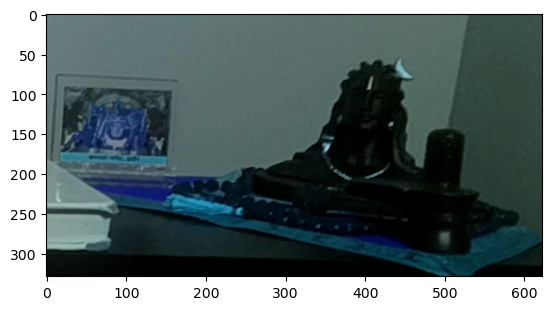

In [7]:
plt.imshow(cropped_region)

In [8]:
random_frames_paths = extract_random_frames()



In [9]:
results = compare_with_frames_fast(cropped_region, random_frames_paths)

In [10]:
def display_results(results, cropped_region, top_n=3):
    for i, (path, ssd, pos) in enumerate(results[:top_n]):
        print(f"Frame: {path}, SSD: {ssd}, Position: {pos}")
        
        # Read the frame image
        frame = cv2.imread(path)
        
        # Draw a rectangle around the best-matching region
        h, w = cropped_region.shape[:2]
        cv2.rectangle(frame, pos, (pos[0] + w, pos[1] + h), (0, 255, 0), 2)

        # Display the frame with the highlighted region
        cv2.imshow(f"Match {i+1}", frame)
        
        # Save the frame with the highlighted region
        save_path = f"Match {i+1}.png"
        cv2.imwrite(save_path, frame)
        print(f"Match {i+1} saved to {save_path}")

    # Wait for a key press to close the images
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [11]:
display_results(results, cropped_region, top_n=10)

Frame: frame_98.png, SSD: 3.798207330873993e-07, Position: (1244, 225)
Match 1 saved to Match 1.png
Frame: frame_95.png, SSD: 0.0026936146896332502, Position: (1245, 217)
Match 2 saved to Match 2.png
Frame: frame_82.png, SSD: 0.016417915001511574, Position: (1248, 194)
Match 3 saved to Match 3.png
Frame: frame_113.png, SSD: 0.01679794304072857, Position: (1198, 245)
Match 4 saved to Match 4.png
Frame: frame_124.png, SSD: 0.021952185779809952, Position: (1180, 239)
Match 5 saved to Match 5.png
Frame: frame_68.png, SSD: 0.029342766851186752, Position: (1280, 190)
Match 6 saved to Match 6.png
Frame: frame_132.png, SSD: 0.03784714266657829, Position: (1159, 228)
Match 7 saved to Match 7.png
Frame: frame_44.png, SSD: 0.20459090173244476, Position: (1297, 159)
Match 8 saved to Match 8.png
Frame: frame_33.png, SSD: 0.28122052550315857, Position: (1297, 152)
Match 9 saved to Match 9.png
Frame: frame_24.png, SSD: 0.3395932614803314, Position: (1297, 150)
Match 10 saved to Match 10.png


# Q5)

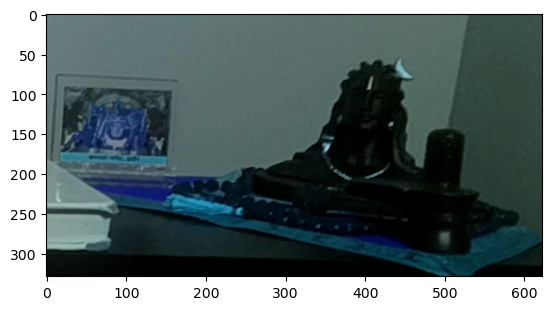

In [12]:
plt.imshow(cropped_region)

Frame: frame_98.png, SSD: 3.798207330873993e-07, Position: (1244, 225)


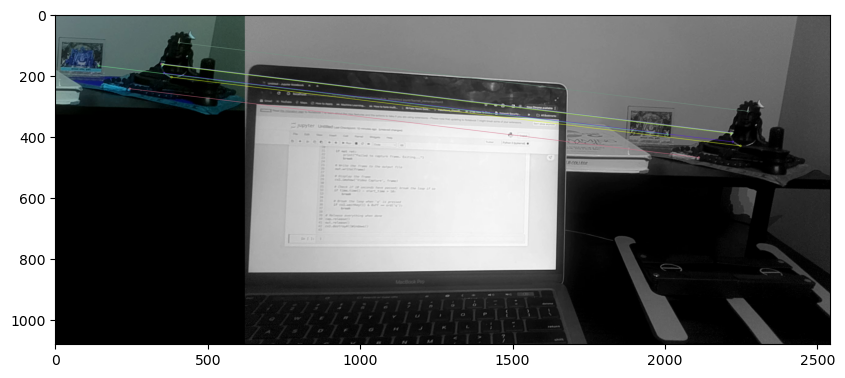

Frame: frame_95.png, SSD: 0.0026936146896332502, Position: (1245, 217)


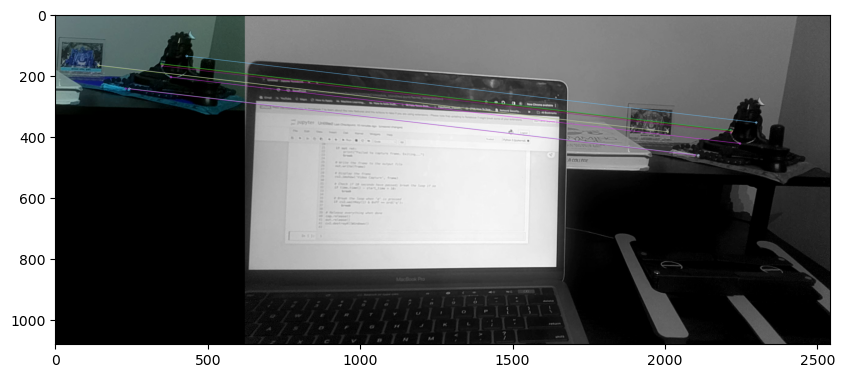

Frame: frame_82.png, SSD: 0.016417915001511574, Position: (1248, 194)


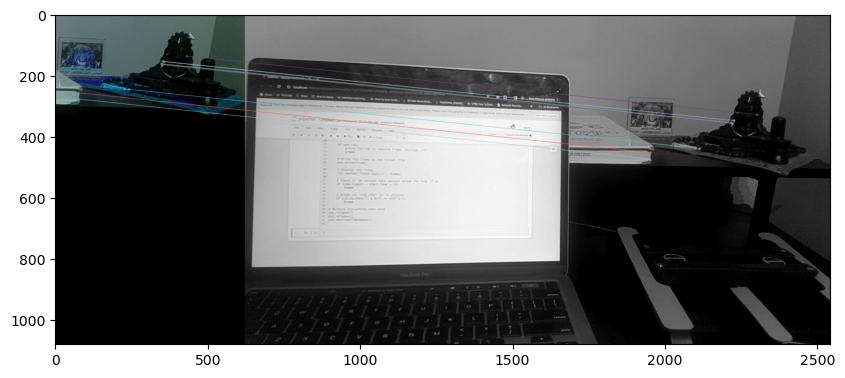

Frame: frame_113.png, SSD: 0.01679794304072857, Position: (1198, 245)


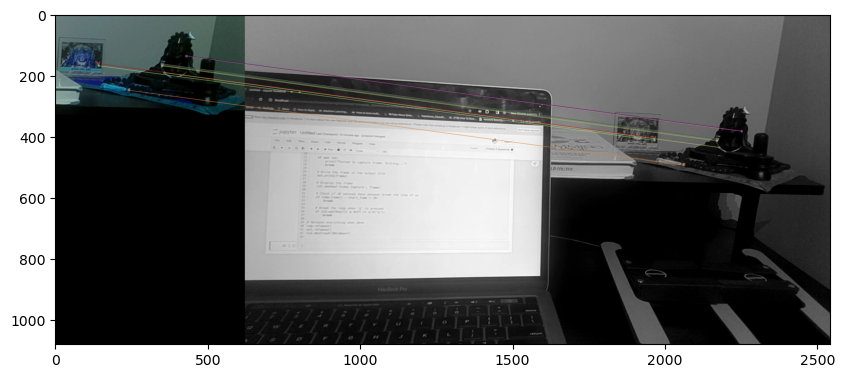

Frame: frame_124.png, SSD: 0.021952185779809952, Position: (1180, 239)


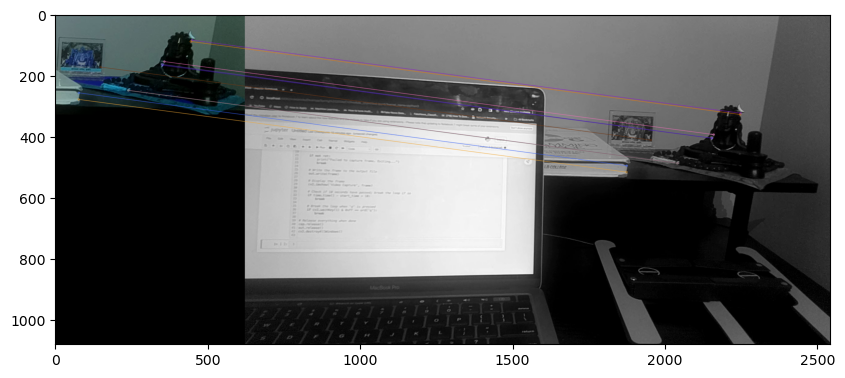

Frame: frame_68.png, SSD: 0.029342766851186752, Position: (1280, 190)


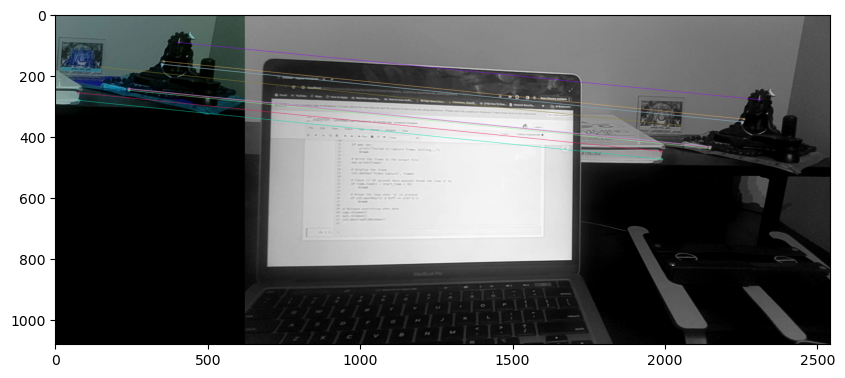

Frame: frame_132.png, SSD: 0.03784714266657829, Position: (1159, 228)


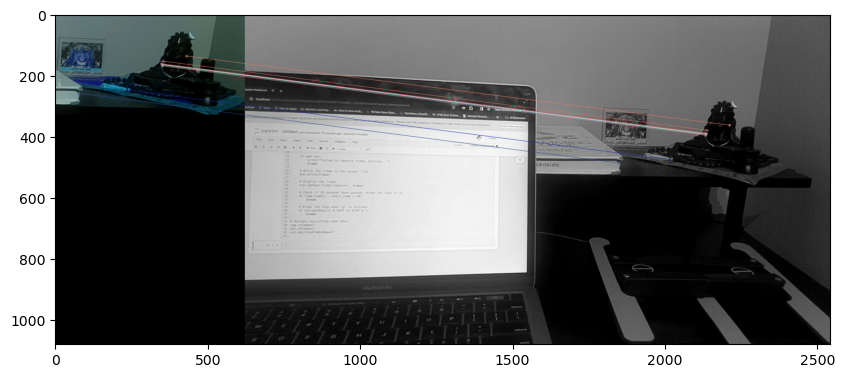

Frame: frame_44.png, SSD: 0.20459090173244476, Position: (1297, 159)


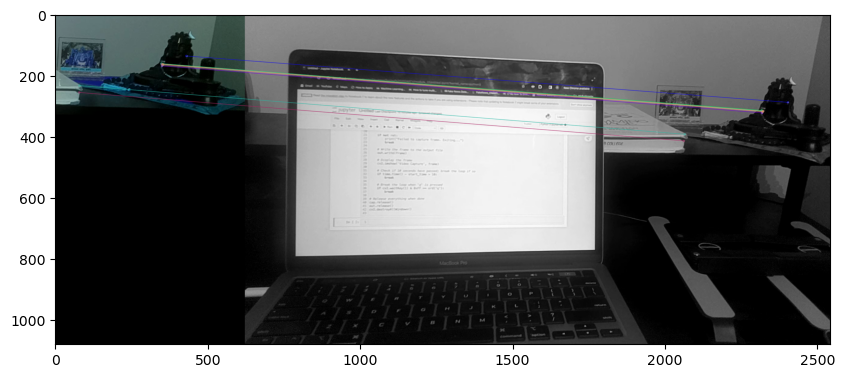

Frame: frame_33.png, SSD: 0.28122052550315857, Position: (1297, 152)


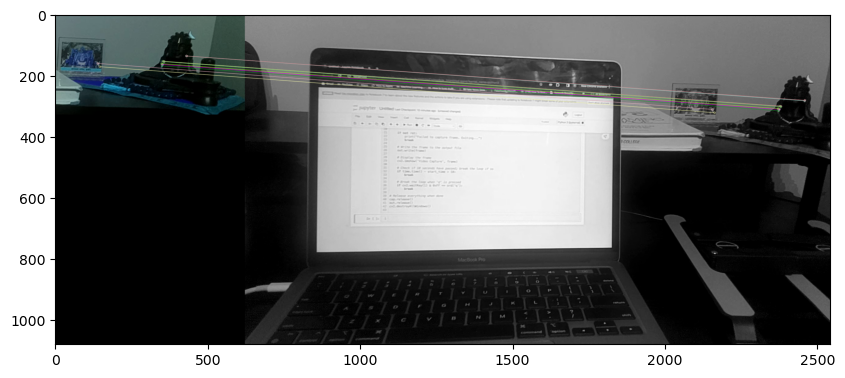

Frame: frame_24.png, SSD: 0.3395932614803314, Position: (1297, 150)


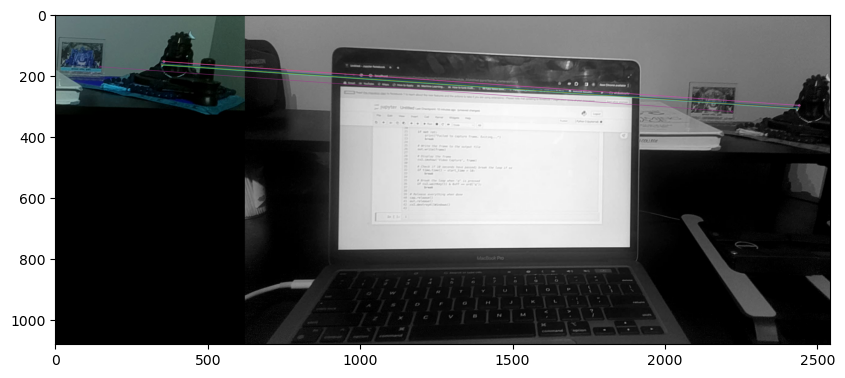

In [13]:
for i, (path, ssd, pos) in enumerate(results[:10]):
        print(f"Frame: {path}, SSD: {ssd}, Position: {pos}")
        
        # Load images
        target_image = cv2.imread(path, 0)  # Target image where to find the object
        template_image = cropped_region  # Template image of the object
        
        # Initialize the ORB detector
        orb = cv2.ORB_create()
        
        # Detect keypoints and descriptors
        keypoints1, descriptors1 = orb.detectAndCompute(template_image, None)
        keypoints2, descriptors2 = orb.detectAndCompute(target_image, None)
        
        # Create BFMatcher object
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        
        # Match descriptors
        matches = bf.match(descriptors1, descriptors2)
        
        # Sort matches by distance (best first)
        matches = sorted(matches, key=lambda x: x.distance)
        
        # Draw the first 10 matches
        matched_image = cv2.drawMatches(template_image, keypoints1, target_image, keypoints2, matches[:10], None, flags=2)
        
        # Display the matched image
        plt.figure(figsize=(10, 10))
        plt.imshow(matched_image)
        plt.show()
